In [1]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1min"

training_file_path: str = f"../data/indicators ({interval})/TSLA_indicators.csv"
validation_file_path: str = f"../data/indicators ({interval})/AAPL_indicators.csv"
testing_file_path: str = f"../data/indicators ({interval})/MSFT_indicators.csv"

training_df = pd.read_csv(training_file_path)
validation_df = pd.read_csv(validation_file_path)
testing_df = pd.read_csv(testing_file_path)

training_preprocessor = DataPreprocessor(training_df, validation_df, testing_df)

X = training_preprocessor.training_target_data_batched
y = training_preprocessor.training_target_data_batched_target

X_train = training_preprocessor.X_train_scaled
y_train = training_preprocessor.training_target_data_batched_target
X_val = training_preprocessor.X_validation_scaled
y_val = training_preprocessor.validation_target_data_batched_target

X_val = X_val[:-training_preprocessor.trend_length]
y_val = y_val[:-training_preprocessor.trend_length]

print("Training Dataset shape:", training_df.shape)
print("Dataset as time series batches:",X.shape, y.shape)
print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)


Training Dataset shape: (5000, 13)
Dataset as time series batches: (4930, 10, 30) (4930,)
Training sets shape: (4930, 10, 30) (4930,)
Validation sets shape: (4870, 10, 30) (4870,)


In [2]:
# %run ../tests/data_preprocessor_validator.py

In [3]:
from models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train.shape[1], X_train.shape[2])
epochs: int = config["data"]["epochs"]
batch_size: int = config["data"]["batch_size"]
my_model = StockTrendLSTMModel(input_shape, X_train, y_train, X_val, y_val, epochs, batch_size)
history = my_model.train()

Epoch 1/30
2465/2465 [==============================] - 12s 4ms/step - loss: 0.3718 - accuracy: 0.8588 - val_loss: 0.5109 - val_accuracy: 0.6924
Epoch 2/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.1822 - accuracy: 0.9323 - val_loss: 0.4186 - val_accuracy: 0.7943
Epoch 3/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.1276 - accuracy: 0.9538 - val_loss: 0.3709 - val_accuracy: 0.8220
Epoch 4/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.0857 - accuracy: 0.9700 - val_loss: 0.1666 - val_accuracy: 0.9598
Epoch 5/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.0530 - accuracy: 0.9846 - val_loss: 0.0861 - val_accuracy: 0.9811
Epoch 6/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.0293 - accuracy: 0.9970 - val_loss: 0.0876 - val_accuracy: 0.9793
Epoch 7/30
2465/2465 [==============================] - 10s 4ms/step - loss: 0.0174 - accuracy: 0.9998 - val_loss: 0.0393 - val_ac

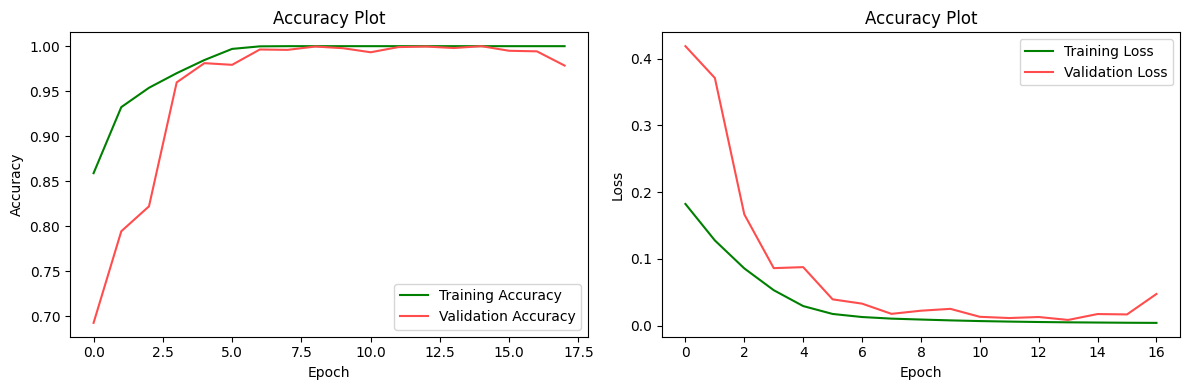

In [4]:
from utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)